# Session 1 - Linear Regression

## Contents

- [Simple Linear Regression](#3.1-Simple-Linear-Regression)
- [Multiple Linear Regression](#3.2-Multiple-Linear-Regression)
- [Other Considerations in the Regression Model](#3.3-Other-Considerations-in-the-Regression-Model)
- [Collineariry](#Collinearity)
- [Next](#Next-Lecture)

In [3]:
# Import and setup matplotlib for graphs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

%matplotlib inline
plt.style.use('seaborn-white')

## 3.1 Simple Linear Regression

First, let's load the Advertising dataset. It contains information on displays sales (in thousands of units) for a particular product and a list of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.

We open the dataset using the `pandas` library which is **the** library for datasets in Python.`

In [4]:
import pandas as pd

# Advertisement spending data
advertising = pd.read_csv('data/Advertising.csv', usecols=[1,2,3,4])

Let's have a look at the content. We can have a glance at the first rows by using the function `head`.

In [5]:
# Preview of the data
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


We can have a general overview of the dataset using the function `info`.

In [6]:
# Overview of all variables
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


If you just want to call a variable in `pandas`, you have to options:
1. use squared brackets as if the varaible was a component of a dictionary
2. use or dot subscripts as if the variable was a function of the data
3. use the `loc` function (best practice)

In [7]:
# 1. Brackets
advertising['TV']

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [8]:
advertising.TV

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [9]:
# The loc function
advertising.loc[:,'TV']

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

Note that the `loc` function is more powerful and is generally used to subset lines and columns.

In [10]:
# Select multiple columns and subset of rows
advertising.loc[0:5,['Sales','TV']]

,Sales,TV
0,22.1,230.1
1,10.4,44.5
2,9.3,17.2
3,18.5,151.5
4,12.9,180.8
5,7.2,8.7


Suppose we are interested in the (linear) relationship between sales and tv advertisement.

$$
sales ≈ \beta_0 + \beta_1 TV.
$$

How are the two two variables related? Visual inspection: scatterplot.

We are going to use a shortcut: the library `seaborn` is a great library for data visualization that allows us to directly print a "best fit" line into a scatterplot.

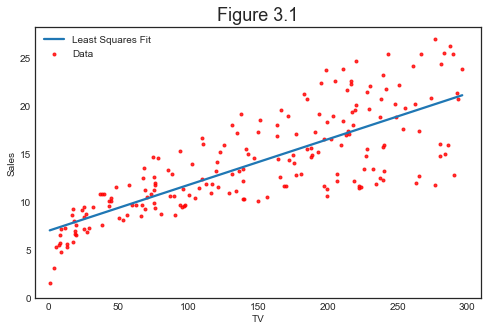

In [11]:
import seaborn as sns

# Figure 3.1 - Least squares fit
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.set_title('Figure 3.1', fontsize=18);

# Plot scatter and best fit line
sns.regplot(x=advertising.TV, y=advertising.Sales, ax=ax, order=1, ci=None, scatter_kws={'color':'r', 's':9})
ax.set_xlim(-10,310); ax.set_ylim(ymin=0)
ax.legend(['Least Squares Fit','Data']);

### 3.1.1 Estimating the Coefficients

How do we estimate the best fit line? Minimize the Residual Sum of Squares (RSS).

First, suppose we have a dataset $\mathcal D = \{x_i, y_i\}_{i=1}^N$. We define the prediction of $y$ based on $X$ as

$$
\hat y_i = \hat \beta X_i
$$

The residuals are the unexplained component of $y$

$$
e_i = y_i - \hat y_i
$$

Our objective function (to be minimized) is the Resdual Sum of Squares (RSS):

$$
RSS := \sum_{n=1}^N e_i^2
$$

And the OLS coefficient is defined as its minimizer:

$$
\hat \beta_{OLS} := \arg\min_{\beta} \sum_{n=1}^N e_i^2 = \arg\min_{\beta} \sum_{n=1}^N (y_i - X_i \beta)^2
$$

Let's use the `sklearn` library to fit a linear regression model of *Sales* on *TV* advertisement.

In [12]:
import sklearn.linear_model as skl_lm

# Regression coefficients (Ordinary Least Squares)
regr = skl_lm.LinearRegression()

# Define X and y
X = advertising.TV.values.reshape(-1,1)
y = advertising.Sales.values

# Fit linear regressions
regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

7.032593549127695
[0.04753664]


We can visualize the residuals as the vertical distances between the data and the prediction line. The objective function RSS is the sum of the squares of the lengths of vertical lines.

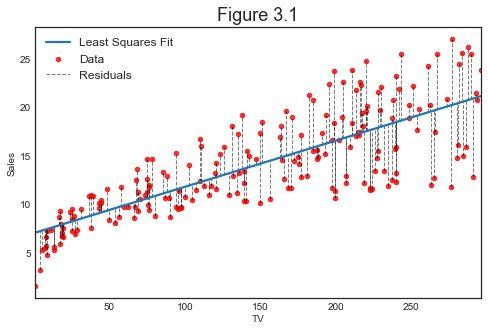

In [16]:
import numpy as np

# Compute predicted values
y_hat = regr.predict(X)

# Figure 3.1
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.set_title('Figure 3.1', fontsize=18);

# Add residuals
sns.regplot(x=advertising.TV, y=advertising.Sales, ax=ax, order=1, ci=None, scatter_kws={'color':'r', 's':20})
ax.vlines(X, np.minimum(y,y_hat), np.maximum(y,y_hat), linestyle='--', color='k', alpha=0.5, linewidth=1)
plt.legend(['Least Squares Fit','Data','Residuals'], fontsize = 12);

The closed form solution in matrix algebra is
$$
\hat \beta_{OLS} = (X'X)^{-1}(X'y)
$$

Python has a series of shortcuts to make the syntax less verbose. However, we still need to import the `inv` function from `numpy`. In Matlab it would be `(X'*X)^{-1}*(X'*y)`, almost literal.

In [17]:
from numpy.linalg import inv

# Compute OLS coefficient with matrix algebra
beta = inv(X.T @ X) @ X.T @ y

print(beta)

[0.08324961]


Why is the result different?

We are missing one coefficient: the intercept. Our regression now looks like this

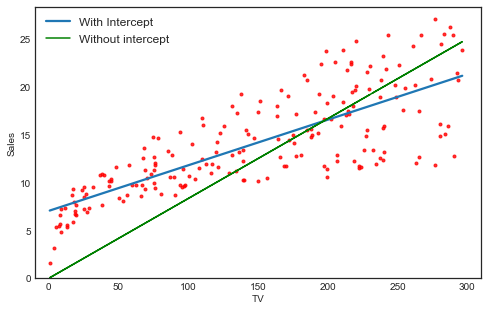

In [18]:
fig, ax = plt.subplots(1,1,figsize=(8,5))

# Add new line on the previous plot
sns.regplot(x=advertising.TV, y=advertising.Sales, ax=ax, order=1, ci=None, scatter_kws={'color':'r', 's':9})
ax.plot(X, beta*X, color='g')
plt.xlim(-10,310); plt.ylim(ymin=0);
ax.legend(['With Intercept', 'Without intercept'], fontsize=12);

How do we insert an intercept using matrix algebra? We add a column of ones.

$$
X_1 = [\boldsymbol{1}, X]
$$

In [19]:
import numpy as np

# How to insert intercept? Add constant: column of ones
one = np.ones(np.shape(X))
X1 = np.concatenate([one,X],axis=1)

print(np.shape(X1))

(200, 2)


Now we compute again the coefficients as before.

$$
\hat \beta_{OLS} = (X_1'X_1)^{-1}(X_1'y)
$$

In [20]:
# Compute beta OLS with intercept
beta_OLS = inv(X1.T @ X1) @ X1.T @ y

print(beta_OLS)

[7.03259355 0.04753664]


Now we have indeed obtained the same exact coefficients.

What does minimizing the Residual Sum of Squares means in practice? How does the objective function looks like?

In [21]:
# Create grid coordinates for plotting
B0 = np.linspace(regr.intercept_-2, regr.intercept_+2, 50)
B1 = np.linspace(regr.coef_-0.02, regr.coef_+0.02, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()/1000

# Minimized RSS
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((regr.intercept_+regr.coef_*X - y)**2)/1000
min_rss

1746.35338337373

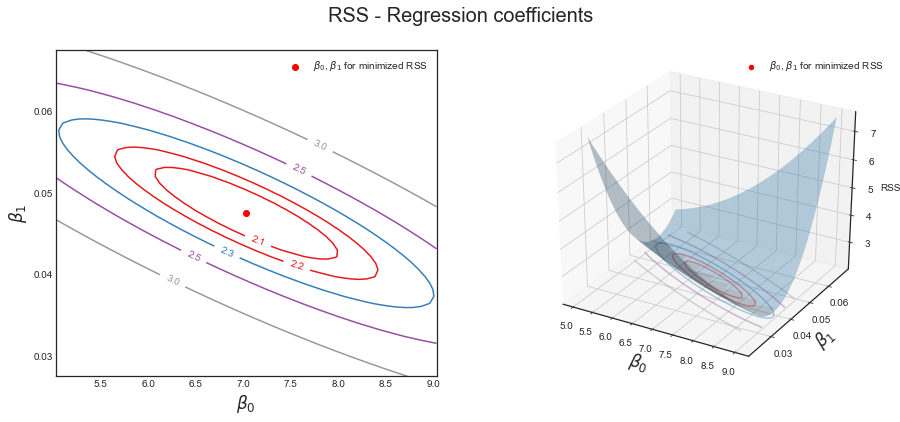

In [22]:
# Figure 3.2 - Regression coefficients - RSS
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(regr.intercept_, regr.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
            alpha=0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlim(Z.min(),Z.max())
ax2.set_ylim(0.02,0.07)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.set_yticks([0.03,0.04,0.05,0.06])
    ax.legend()

Why does it look different from the figure in the book? In the book they standardazed the X variable so that the contour sets are circular and not ellyptical.

### 3.1.2 Assessing the Accuracy of the Coefficient Estimates

How accurate is our regression fit? Suppose we were drawing different (small) samples from the same data generating process, for example

$$
y_i = 2 + 3x_i + \varepsilon_i
$$

where $x_i \sim N(0,1)$ and $\varepsilon \sim N(0,3)$.

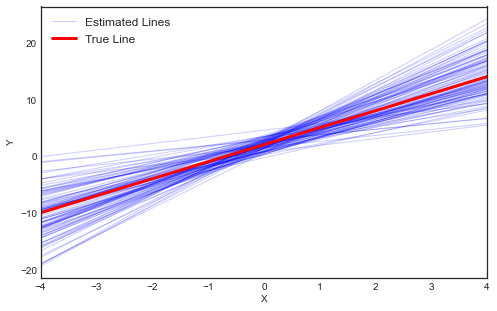

In [23]:
fig, ax = plt.subplots(1,1,figsize=(8,5))

# Init
N = 30;
K = 100;
beta_hat = np.zeros((2,K))
x = np.linspace(-4,4,N)

# Set seed
np.random.seed(1)

# K simulations
for i in range(K):
    # Simulate data
    x1 = np.random.normal(0,1,N).reshape([-1,1])
    X = np.concatenate([np.ones(np.shape(x1)), x1], axis=1)
    epsilon = np.random.normal(0,5,N)
    beta0 = [2,3]
    y = X @ beta0 + epsilon

    # Estimate coefficients
    beta_hat[:,i] = inv(X.T @ X) @ X.T @ y

    # Plot line
    ax.plot(x, beta_hat[0,i] + x*beta_hat[1,i], color='blue', alpha=0.2, linewidth=1)
    if i==K-1:
        ax.plot(x, beta_hat[0,i] + x*beta_hat[1,i], color='blue', alpha=0.2, linewidth=1, label='Estimated Lines')
    
# Plot true line
ax.plot(x, 2 + 3*x, color='red', linewidth=3, label='True Line');
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.legend(fontsize=12);
ax.set_xlim(-4,4);

The `regplot` command lets us automatically draw confidence intervals. Let's draw the last simulated dataset with conficence intervals.

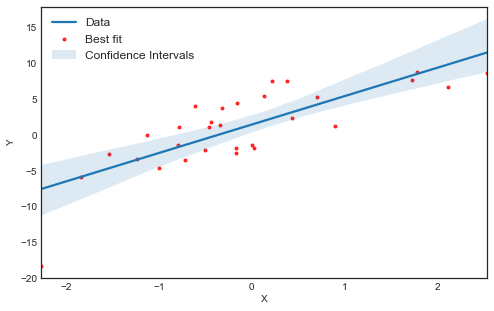

In [24]:
fig, ax = plt.subplots(1,1,figsize=(8,5))

# Plot last simulation scatterplot with confidence interval
sns.regplot(x=x1, y=y, ax=ax, order=1, scatter_kws={'color':'r', 's':9});
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.legend(['Data','Best fit', 'Confidence Intervals'], fontsize=12);

As we can see, depending on the sample, we get a different estimate of the linear relationship between $x$ and $y$. However, there estimates are on average correct. Indeed, we can visualize their distribution.

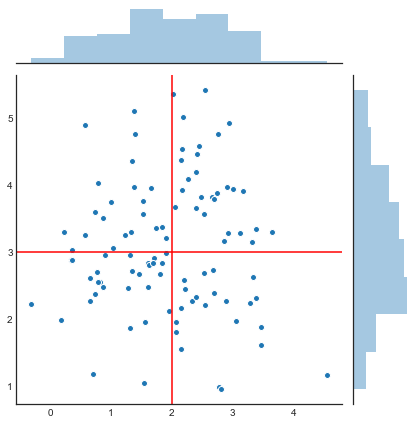

In [25]:
# Plot distribution of coefficients
plot = sns.jointplot(x=beta_hat[0,:], y=beta_hat[1,:], edgecolor="white");
plot.ax_joint.axvline(x=2, color='red');
plot.ax_joint.axhline(y=3, color='red');

How do we compute confidence intervals by hand?

$$
Var(\hat \beta_{OLS}) = \sigma^2 (X'X)^{-1}
$$

where $\sigma^2 = Var(\varepsilon)$. Since we do not know $Var(\varepsilon)$, we estimate it as $Var(e)$.

$$
\hat Var(\hat \beta_{OLS}) = \hat \sigma^2 (X'X)^{-1}
$$

If we assume the standard errors are normally distributed (or we apply the Central Limit Theorem, assuming $n \to \infty$), a 95% confidence interval for the OLS coefficient takes the form

$$
CI(\hat \beta_{OLS}) = \Big[ \hat \beta_{OLS} - 1.96 \times \hat SE(\hat \beta_{OLS}) \ , \ \hat \beta_{OLS} + 1.96 \times \hat SE(\hat \beta_{OLS}) \Big]
$$

where $\hat SE(\hat \beta_{OLS}) = \sqrt{\hat Var(\hat \beta_{OLS})}$.

In [26]:
# Import again X and y from example above
X = advertising.TV.values.reshape(-1,1)
X1 = np.concatenate([np.ones(np.shape(X)), X], axis=1)
y = advertising.Sales.values

# Compute residual variance
X_hat = X1 @ beta_OLS
e = y - X_hat
sigma = np.var(e)
var_beta_OLS = sigma * inv(X1.T @ X1)

# Take elements on the diagonal and square them
std_beta_OLS = [var_beta_OLS[0,0]**.5, var_beta_OLS[1,1]**.5]

print(std_beta_OLS)

[0.4555479737400674, 0.0026771203500466564]


The `statsmodels` library allows us to produce nice tables with parameter estimates and standard errors.

In [27]:
# Table 3.1 & 3.2
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Compact version with confidence intervals
est = smf.ols('Sales ~ TV', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


### 3.1.3 Assessing the Accuracy of the Model

What metrics can we use to assess whether the model is a good model, in terms of capturing the relationship between the variables?

First, we can compute our objective function: the Residual Sum of Squares (*RSS*). Lower values of our objective function imply that we got a better fit.

In [28]:
# RSS with regression coefficients
RSS = sum(e**2)

print(RSS)

2102.5305831313512


The problem with *RSS* as a metric is that it's hard to compare different regressions since its scale depends on the magnitude of the variables.

One measure of fit that does not depend on the magnitude of the variables is $R^2$: the percentage of our explanatory variable explained by the model

$$
R^2 = 1 - \frac{\text{RSS}}{\text{TSS}}
$$

where

$$
TSS = \sum_{i=1}^N (y_i - \bar y)^2
$$

In [29]:
# TSS
TSS = sum( (y-np.mean(y))**2 )

# R2
R2 = 1 - RSS/TSS

print(R2)

0.6118750508500708


Can the $R^2$ metric be negative? When?

## 3.2 Multiple Linear Regression

What if we have more than one explanatory variable? Spoiler: we already did, but one was a constant.

Let's have a look at the regression of *Sales* on *Radio* and *TV* advertisement expenditure separately.

In [30]:
# Table 3.3 (1)
est = smf.ols('Sales ~ Radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
Radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [31]:
# Table 3.3 (2)
est = smf.ols('Sales ~ Newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
Newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


It seems that both Radio and Newspapers are positively correlated with *Sales*. Why don't we estimate a unique regression with both dependent variables?

### 3.2.1 Estimating the Regression Coefficients

Suppose now we enrich our previous model adding all different forms of advertisement:

$$
\text{Sales} = \beta_0 + \beta_1 \text{TV} + \beta_2 \text{Radio} + \beta_3 \text{Newspaper} + \varepsilon
$$

We estimate it using the `statsmodels` `ols` library.

In [32]:
# Table 3.4
est = smf.ols('Sales ~ TV + Radio + Newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.9389,0.312,9.422,0.000,2.324,3.554
TV,0.0458,0.001,32.809,0.000,0.043,0.049
Radio,0.1885,0.009,21.893,0.000,0.172,0.206
Newspaper,-0.0010,0.006,-0.177,0.860,-0.013,0.011


Why now it seems that there is no relationship between Sales and Newspaper while the univariate regression told us the opposite?

Let's explore the correlation between those variables.

In [33]:
# Table 3.5 - Correlation Matrix
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Let's try to inspect the relationship visually. Note that now the linear best fit is going to be 3-dimensional. In order to make it visually accessible, we consider only on *TV* and *Radio* advertisement expediture as dependent variables. The best fit will be a plane instead of a line.

In [39]:
# X and y
X = advertising[['Radio', 'TV']]
y = advertising.Sales

# Fit regression
est = smf.ols('Sales ~ Radio + TV', advertising).fit()
print(est.params)

Intercept    2.921100
Radio        0.187994
TV           0.045755
dtype: float64


In [40]:
# What are the min/max values of Radio & TV?
# Use these values to set up the grid for plotting.
advertising[['Radio', 'TV']].describe()

,Radio,TV
count,200.000000,200.000000
mean,23.264000,147.042500
std,14.846809,85.854236
min,0.000000,0.700000
25%,9.975000,74.375000
50%,22.900000,149.750000
75%,36.525000,218.825000
max,49.600000,296.400000


In [41]:
# Create a coordinate grid
Radio = np.arange(0,50)
TV = np.arange(0,300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(est.params[0] + B1[i,j]*est.params[1] + B2[i,j]*est.params[2])

In [42]:
# Residuals
e = y - est.predict(X)

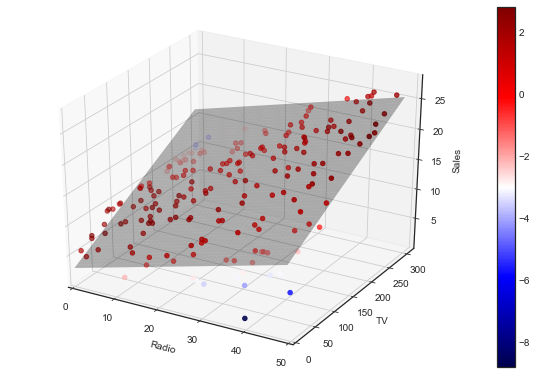

In [43]:
# Figure 3.5 - Multiple Linear Regression
fig = plt.figure(figsize=(8,5))
ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, color='k', alpha=0.3)
points = ax.scatter3D(advertising.Radio, advertising.TV, advertising.Sales, c=e, cmap="seismic")
plt.colorbar(points)

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(bottom=0)
ax.set_zlabel('Sales');

### 3.2.2 Some Important Questions

How do you check whether the model fit well the data with multiple regressors? `statmodels` and most regression packages automatically outputs a 

In [44]:
# Measires of fit
est.summary().tables[0]

Dep. Variable:,Sales,R-squared:,0.897
Model:,OLS,Adj. R-squared:,0.896
Method:,Least Squares,F-statistic:,859.6
Date:,"Fri, 02 Oct 2020",Prob (F-statistic):,4.83e-98
Time:,10:14:20,Log-Likelihood:,-386.20
No. Observations:,200,AIC:,778.4
Df Residuals:,197,BIC:,788.3
Df Model:,2,,
Covariance Type:,nonrobust,,


First measure: the **F-test**. The F-test tries to answe the question "*Is There a Relationship Between the Response and Predictors?*"

In particular, it tests the following hypothesis

$$
H_1: \text{is at least one coefficient different from zero?}
$$

against the null hypothesis

$$
H_0: \beta_0 = \beta_1 = ... = 0
$$

This hypothesis test is performed by computing the F-statistic,

$$
F=\frac{(\mathrm{TSS}-\mathrm{RSS}) / p}{\operatorname{RSS} /(n-p-1)}
$$

Let's try to compute it by hand.

In [61]:
# Init
e = y - est.predict(X)
RSS = np.sum(e**2)
TSS = np.sum((y - np.mean(y))**2)
(n,p) = np.shape(X)

# Compute F
F = ((TSS - RSS)/p) / (RSS/(n-p-1))
print('F = %.4f' % F)

F = 859.6177


A rule of thumb is to reject $H_0$ if $F > 10$.

We can also test that a particular subset of coefficients are equal to zero. In that case, we just substitute the Total Sum of Squares (TSS) with the Residual Sum of Squares under the null. 

$$
F=\frac{(\mathrm{RSS_0}-\mathrm{RSS}) / p}{\operatorname{RSS} /(n-p-1)}
$$

i.e. we perfome the regression under the null hypothesis and we compute

$$
RSS_0 = \sum_{n=1}^N (y_i - X_i \beta)^2 \quad s.t. \quad  H_0
$$

## 3.3 Other Considerations in the Regression Model

### 3.3.1 Qualitative Predictors

What if some variables are qualitative instead of quantitative? Let's change dataset and use the `credit` dataset.

In [63]:
# Credit ratings dataset
credit = pd.read_csv('data/Credit.csv', usecols=list(range(1,12)))

This dataset contains information on credit ratings, i.e. each person is assigned a `Rating` score based on his/her own individual characteristics.

In [66]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


As we can see, some variables like `Gender`, `Student` or `Married` are not numeric.

In [67]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


Let's consider the variable `Student`. From a quick inspection it looks like it's a binary *Yes/No* variable. Let's check by listing all its values.

In [68]:
# What values does the Student variable take?
credit['Student'].unique()

array(['No', 'Yes'], dtype=object)

It is indeed a *Yes/No* variable. We can convert it into a binary variable.

In [69]:
# Convert 'Student' to be a binary variable
credit['Student_01'] = credit.Student.map({'No':0, 'Yes':1})
credit['Student_01'].unique()

array([0, 1])

One way to have a full inspection of many variables at the same time is to draw a correlation plot. The `seaborn`  function `pairplot` plots the distribution of each variable and the correlation between every varaible pair. It is a great way to have at once a comprehensive overview of all the variables and their pairwise relationships.

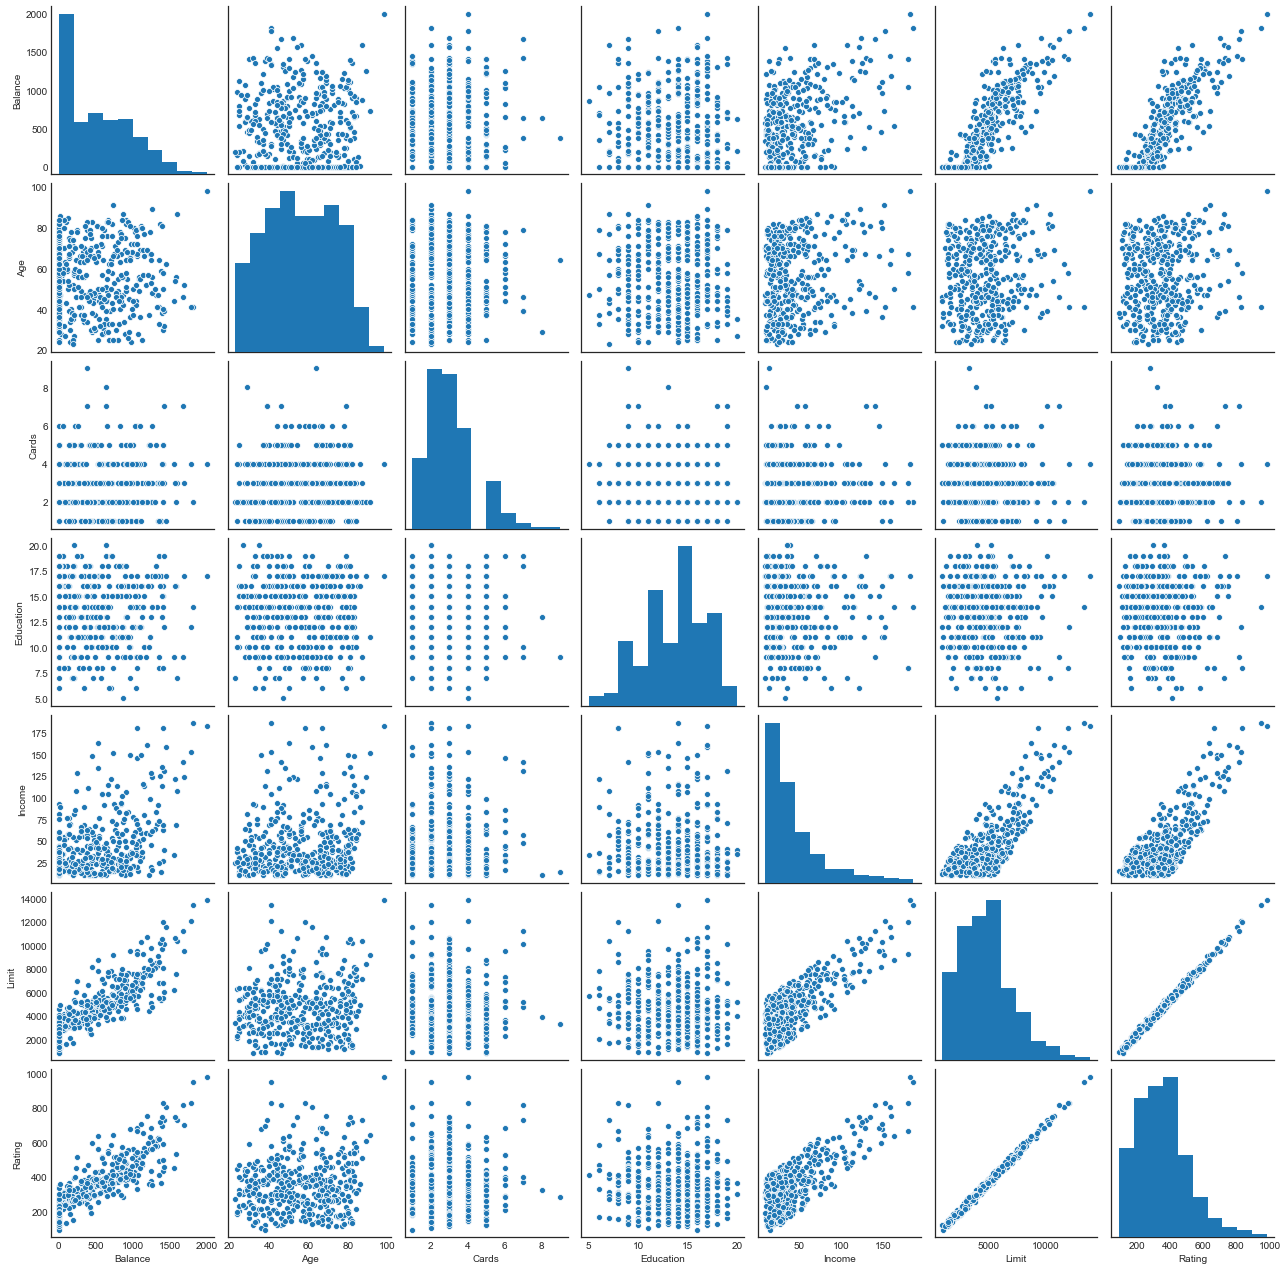

In [84]:
# Figure 3.6
sns.pairplot(credit[['Balance','Age','Cards','Education','Income','Limit','Rating']]);

What happens if you pass a binary varaible to `statsmodel`? It automatically generates a dummy out of it.

In [70]:
# Table 3.7
est = smf.ols('Balance ~ Gender', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,509.8031,33.128,15.389,0.000,444.675,574.931
Gender[T.Female],19.7331,46.051,0.429,0.669,-70.801,110.267


If a variable takes more than one value, `statsmodel` automatically generates a uniqe dummy for each level (-1).

In [71]:
# Table 3.8
est = smf.ols('Balance ~ Ethnicity', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,531.0000,46.319,11.464,0.000,439.939,622.061
Ethnicity[T.Asian],-18.6863,65.021,-0.287,0.774,-146.515,109.142
Ethnicity[T.Caucasian],-12.5025,56.681,-0.221,0.826,-123.935,98.930


### 3.3.2 Extensions of the Linear Model

We have seen that both TV and Radio advertisement are positively associated with Sales. What if there is a synergy? For example it might be that if someone sees an ad *both* on TV and on the radio, s/he is much more likely to buy the product.

Consider the following model

$$
\text{Sales} ≈ \beta_0 + \beta_1 \text{TV} + \beta_2 \text{Radio} + \beta_3 \text{TV} \times \text{Radio}
$$

In [87]:
# Table 3.9 - Interaction Variables
est = smf.ols('Sales ~ TV + Radio + TV*Radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
Radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV:Radio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


We can do interactions with qualitative variables as well. Conside the credit rating dataset. 

What if `Balance` depends by `Income` differently, depending on whether one is a `Student` or not?

Consider the following model:

$$
\text{Balance} = \beta_0 + \beta_1 \text{Income} + \beta_2 \text{Student} + \beta_3 \text{Income} \times \text{Student} + \varepsilon
$$

The last coefficient $\beta_3$ should tell us how much `Balance` increases in `Income` for `Students` with respect to non-Students.

Indeed, we can decompose the regression in the following equivalent way:

$$
\text{Balance} = \beta_0 + \beta_1 \text{Income} + \beta_2 \text{Student} + \beta_3 \text{Income} \times \text{Student} + \varepsilon
$$

In [93]:
# Figure 3.7 - Interaction between qualitative and quantative variables
est1 = smf.ols('Balance ~ Income + Student_01', credit).fit()
regr1 = est1.params
est2 = smf.ols('Balance ~ Income + Income*Student_01', credit).fit()
regr2 = est2.params

print('Regression 1 - without interaction term')
print(regr1)
print('\nRegression 2 - with interaction term')
print(regr2)

Regression 1 - without interaction term
Intercept     211.142964
Income          5.984336
Student_01    382.670539
dtype: float64

Regression 2 - with interaction term
Intercept            200.623153
Income                 6.218169
Student_01           476.675843
Income:Student_01     -1.999151
dtype: float64


Without the interaction term, the two lines have different levels but the same slope. Introducing an interaction term allows the two groups to have different responses to Income.

In [ ]:
# Income (x-axis)
income = np.linspace(0,150)

# Balance without interaction term (y-axis)
student1 = np.linspace(regr1['Intercept']+regr1['Student_01'],
                       regr1['Intercept']+regr1['Student_01']+150*regr1['Income'])
non_student1 =  np.linspace(regr1['Intercept'], regr1['Intercept']+150*regr1['Income'])

# Balance with iteraction term (y-axis)
student2 = np.linspace(regr2['Intercept']+regr2['Student_01'],
                       regr2['Intercept']+regr2['Student_01']+
                       150*(regr2['Income']+regr2['Income:Student_01']))
non_student2 =  np.linspace(regr2['Intercept'], regr2['Intercept']+150*regr2['Income'])

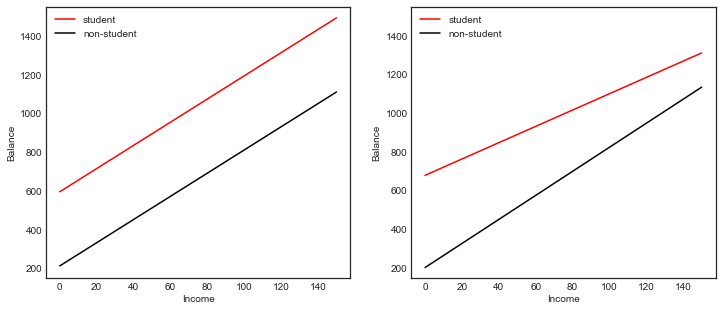

In [125]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Create plot
ax1.plot(income, student1, 'r', income, non_student1, 'k')
ax2.plot(income, student2, 'r', income, non_student2, 'k')

for ax in fig.axes:
    ax.legend(['student', 'non-student'], loc=2)
    ax.set_xlabel('Income')
    ax.set_ylabel('Balance')
    ax.set_ylim(ymax=1550)

What if we allow for further non-linearities? Let's change dataset again and use the `car` dataset.

In [95]:
# Automobile dataset
auto = pd.read_csv('data/Auto.csv', na_values='?').dropna()

This dataset contains information of a wide variety of car models.

In [104]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


Suppose we wanted to understand which car caracteristics are correlated with higher efficiency, i.e. `mpg` (miles per gallon).

In [97]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


Consider the relationship between `mpg` and `horsepower`. It might be a highly non-linear relationship.

$$
\text{mpg} ≈ \beta_0 + \beta_1 \text{horsepower} + \beta_2 \text{horsepower}^2 + ... ???
$$

How many terms should we include?

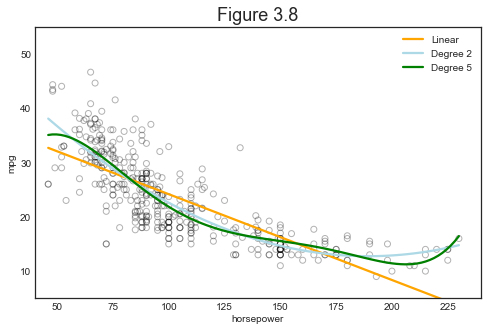

In [100]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
ax.set_title('Figure 3.8', fontsize=18)

# Figure 3.8 - Non-linear relationships
plt.scatter(x=auto.horsepower, y=auto.mpg, facecolors='None', edgecolors='k', alpha=.3) 
sns.regplot(x=auto.horsepower, y=auto.mpg, ci=None, label='Linear', scatter=False, color='orange')
sns.regplot(x=auto.horsepower, y=auto.mpg, ci=None, label='Degree 2', order=2, scatter=False, color='lightblue')
sns.regplot(x=auto.horsepower, y=auto.mpg, ci=None, label='Degree 5', order=5, scatter=False, color='g')
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);

As we can see, the tails are highly unstable depending on the specification.

In [40]:
# Table 3.10
auto['horsepower2'] = auto.horsepower**2
auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,16900.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,27225.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,22500.0


In [41]:
est = smf.ols('mpg ~ horsepower + horsepower2', auto).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,56.9001,1.800,31.604,0.000,53.360,60.440
horsepower,-0.4662,0.031,-14.978,0.000,-0.527,-0.405
horsepower2,0.0012,0.000,10.080,0.000,0.001,0.001


How can we assess which one is better? Look at the residuals.

In [42]:
# Figure 3.9
regr = skl_lm.LinearRegression()

# Linear fit
X = auto.horsepower.values.reshape(-1,1)
y = auto.mpg
regr.fit(X, y)

auto['pred1'] = regr.predict(X)
auto['resid1'] = auto.mpg - auto.pred1

# Quadratic fit
X2 = auto[['horsepower', 'horsepower2']]
regr.fit(X2, y)

auto['pred2'] = regr.predict(X2)
auto['resid2'] = auto.mpg - auto.pred2

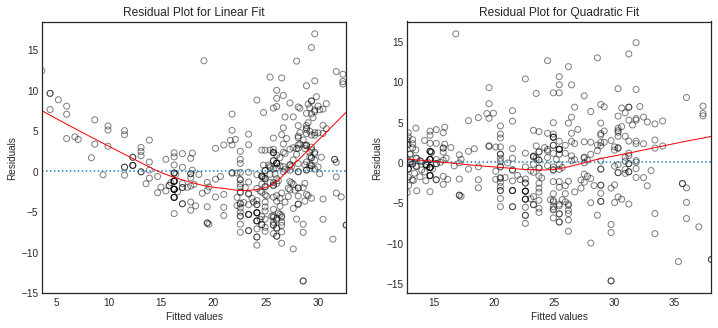

In [43]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
sns.regplot(x=auto.pred1, y=auto.resid1, lowess=True, 
            ax=ax1, line_kws={'color':'r', 'lw':1},
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax1.hlines(0,xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dotted')
ax1.set_title('Residual Plot for Linear Fit')

# Right plot
sns.regplot(x=auto.pred2, y=auto.resid2, lowess=True,
            line_kws={'color':'r', 'lw':1}, ax=ax2,
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax2.hlines(0,xmin=ax2.xaxis.get_data_interval()[0],
           xmax=ax2.xaxis.get_data_interval()[1], linestyles='dotted')
ax2.set_title('Residual Plot for Quadratic Fit')

for ax in fig.axes:
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')

Observations with high residuals have a good chance of being highly influentials. However, do not have to be.

In [107]:
from numpy.random import normal as rnorm
np.random.seed(2)

# Generate random y
n = 50
X = rnorm(1,1,(n,1))
e = rnorm(0,0.5,(n,1))
b0 = 3
y = X*b0 + e

# Generate outlier
X[20] = 1
y[20] = 7

# Short regression without observation number 41
X_small = np.delete(X, 20)
y_small = np.delete(y, 20)

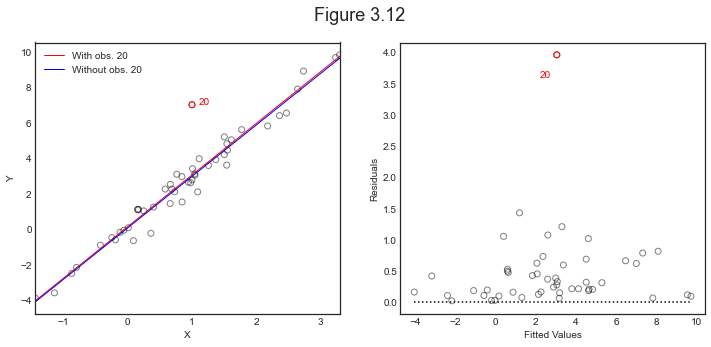

In [110]:
# Figure 3.12
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5)) 
fig.suptitle('Figure 3.12', fontsize=18)

# Plot 1
ax1.scatter(x=X, y=y, facecolors='None', edgecolors='k', alpha=.5) 
sns.regplot(x=X, y=y, ax=ax1, order=1, ci=None, scatter=False, line_kws={'color':'r', 'lw':1})
sns.regplot(x=X_small, y=y_small, ax=ax1, order=1, ci=None, scatter=False, line_kws={'color':'b', 'lw':1})
ax1.set_xlabel('X'); ax1.set_ylabel('Y'); 
ax1.legend(['With obs. 20', 'Without obs. 20']);
# Hihglight outliers
ax1.scatter(x=X[20], y=y[20], facecolors='None', edgecolors='r', alpha=1) 
ax1.annotate("20", (1.1, 7), color='r')

# Compute fitted values and residuals
r = regr.fit(X, y)
y_hat = r.predict(X)
e = np.abs(y - y_hat)

# Plot 2
ax2.scatter(x=y_hat, y=e, facecolors='None', edgecolors='k', alpha=.5)
ax2.set_xlabel('Fitted Values'); ax2.set_ylabel('Residuals');
ax2.hlines(0,xmin=ax2.xaxis.get_data_interval()[0],
           xmax=ax2.xaxis.get_data_interval()[1], linestyles='dotted',color='k')
# Highlight outlier
ax2.scatter(x=y_hat[20], y=e[20], facecolors='None', edgecolors='r', alpha=1) 
ax2.annotate("20", (2.2, 3.6), color='r');

A better concept of "influential observation" is the Leverage, which represents how much an observation is distant from the others in terms of observables.

The leverage formula of observation $i$ is

$$
h_i = x_i (X' X)^{-1} x_i'
$$

However, leverage alone is not necessarily enough for an observation to being highly influential.

In [ ]:
# Generate other outlier
X[41] = 4
y[41] = 12

# Short regression without observation number 41
X_small = np.delete(X_small, 41)
y_small = np.delete(y_small, 41)

# Compute leverage
H = X @ inv(X.T @ X) @ X.T
h = np.diagonal(H)

# Compute fitted values and residuals
y_hat = r.predict(X)
e = np.abs(y - y_hat) 

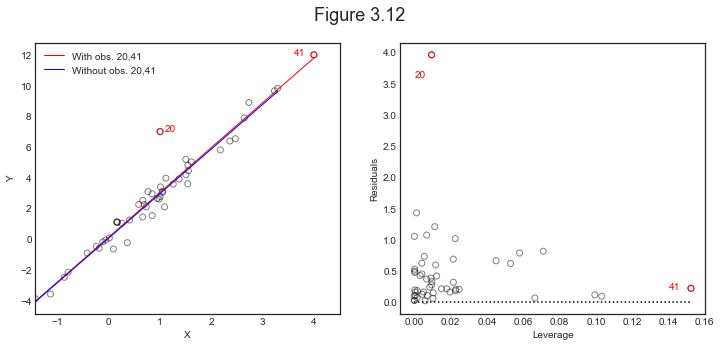

In [112]:
# Figure 3.13
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5)) 
fig.suptitle('Figure 3.12', fontsize=18)



# Plot 1
ax1.scatter(x=X, y=y, facecolors='None', edgecolors='k', alpha=.5) 
ax1.scatter(x=X[[20,41]], y=y[[20,41]], facecolors='None', edgecolors='r', alpha=1) 
sns.regplot(x=X, y=y, ax=ax1, order=1, ci=None, scatter=False, line_kws={'color':'r', 'lw':1})
sns.regplot(x=X_small, y=y_small, ax=ax1, order=1, ci=None, scatter=False, line_kws={'color':'b', 'lw':1})
ax1.set_xlabel('X'); ax1.set_ylabel('Y'); ax1.axis(xmax=4.5);
ax1.legend(['With obs. 20,41', 'Without obs. 20,41']);

# Highlight points
ax1.annotate("20", (1.1, 7), color='r')
ax1.annotate("41", (3.6, 12), color='r');



# Plot 2
ax2.scatter(x=h, y=e, facecolors='None', edgecolors='k', alpha=.5)
ax2.set_xlabel('Leverage'); ax2.set_ylabel('Residuals'); 
ax2.hlines(0,xmin=ax2.xaxis.get_data_interval()[0],
           xmax=ax2.xaxis.get_data_interval()[1], linestyles='dotted',color='k')
# Highlight outlier
ax2.scatter(x=h[[20,41]], y=e[[20,41]], facecolors='None', edgecolors='r', alpha=1);

# Highlight points
ax2.annotate("20", (0, 3.6), color='r')
ax2.annotate("41", (0.14, 0.2), color='r');

What really matters is a combination of both: observations with high leverage and high residuals, i.e. observations that are not only different in terms of observables (high leverage) but are also different in terms of their relationship between observables and dependent variable (high residual).

In [113]:
# Generate other outlier
X[7] = 4
y[7] = 7

# Short regression without observation number 41
X_small = np.delete(X, 7)
y_small = np.delete(y, 7)

# Compute leverage
H = X @ inv(X.T @ X) @ X.T
h = np.diagonal(H)

# Compute fitted values and residuals
r = regr.fit(X, y)
y_hat = r.predict(X)
e = np.abs(y - y_hat)

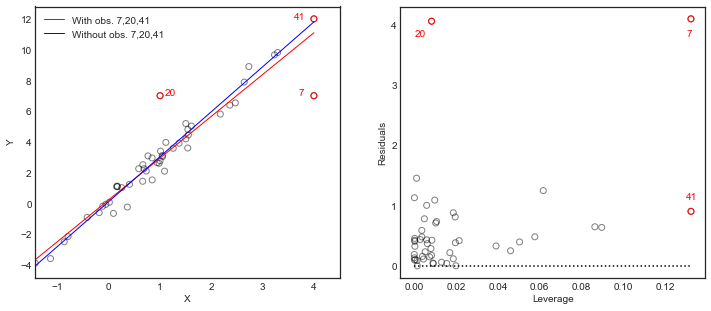

In [115]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5)) 


# Plot 1
ax1.scatter(x=X, y=y, facecolors='None', edgecolors='k', alpha=.5) 
ax1.scatter(x=X[[7,20,41]], y=y[[7,20,41]], facecolors='None', edgecolors='r', alpha=1) 
sns.regplot(x=X, y=y, ax=ax1, order=1, ci=None, scatter=False, line_kws={'color':'r', 'lw':1})
sns.regplot(x=X_small, y=y_small, ax=ax1, order=1, ci=None, scatter=False, line_kws={'color':'b', 'lw':1})
ax1.set_xlabel('X'); ax1.set_ylabel('Y'); ax1.axis(xmax=4.5);
ax1.legend(['With obs. 7,20,41', 'Without obs. 7,20,41']);

# Highlight points
ax1.annotate("7", (3.7, 7), color='r')
ax1.annotate("20", (1.1, 7), color='r')
ax1.annotate("41", (3.6, 12), color='r');



# Plot 2
ax2.scatter(x=h, y=e, facecolors='None', edgecolors='k', alpha=.5)
ax2.set_xlabel('Leverage'); ax2.set_ylabel('Residuals'); 
ax2.hlines(0,xmin=ax2.xaxis.get_data_interval()[0],
           xmax=ax2.xaxis.get_data_interval()[1], linestyles='dotted',color='k')
# Highlight outlier
ax2.scatter(x=h[[7,20,41]], y=e[[7,20,41]], facecolors='None', edgecolors='r', alpha=1);

# Highlight points
ax2.annotate("7", (0.13, 3.8), color='r');
ax2.annotate("20", (0, 3.8), color='r')
ax2.annotate("41", (0.13, 1.1), color='r');

## Collinearity

Collinearity is the situation in which two dependent varaibles are higly correlated with each other. Algebraically, this is a problem because the $X'X$ matrix becomes almost-non-invertible.

An example is `Rating` and `Limit` in the credit ratings dataset.

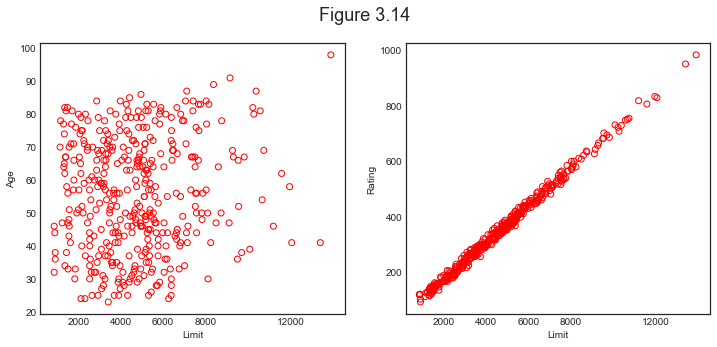

In [116]:
# Figure 3.14
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5)) 
fig.suptitle('Figure 3.14', fontsize=18)

# Left plot
ax1.scatter(credit.Limit, credit.Age, facecolor='None', edgecolor='r')
ax1.set_ylabel('Age')

# Right plot
ax2.scatter(credit.Limit, credit.Rating, facecolor='None', edgecolor='r')
ax2.set_ylabel('Rating')

for ax in fig.axes:
    ax.set_xlabel('Limit')
    ax.set_xticks([2000,4000,6000,8000,12000])

Looking at the objective function, RSS, helps understanding what is the problem.

In [120]:
from sklearn.preprocessing import scale

y = credit.Balance

# Regression for left plot
X = credit[['Age', 'Limit']]
regr1 = skl_lm.LinearRegression()
regr1.fit(scale(X.astype('float'), with_std=False), y)
print('Age/Limit\n',regr1.intercept_)
print(regr1.coef_)

# Regression for right plot
X2 = credit[['Rating', 'Limit']]
regr2 = skl_lm.LinearRegression()
regr2.fit(scale(X2.astype('float'), with_std=False), y)
print('\nRating/Limit\n',regr2.intercept_)
print(regr2.coef_)

Age/Limit
 520.0150000000001
[-2.29148553  0.17336497]

Rating/Limit
 520.015
[2.20167217 0.02451438]


In [121]:
# Create grid coordinates for plotting
B_Age = np.linspace(regr1.coef_[0]-3, regr1.coef_[0]+3, 100)
B_Limit = np.linspace(regr1.coef_[1]-0.02, regr1.coef_[1]+0.02, 100)

B_Rating = np.linspace(regr2.coef_[0]-3, regr2.coef_[0]+3, 100)
B_Limit2 = np.linspace(regr2.coef_[1]-0.2, regr2.coef_[1]+0.2, 100)

X1, Y1 = np.meshgrid(B_Limit, B_Age, indexing='xy')
X2, Y2 = np.meshgrid(B_Limit2, B_Rating, indexing='xy')
Z1 = np.zeros((B_Age.size,B_Limit.size))
Z2 = np.zeros((B_Rating.size,B_Limit2.size))

Limit_scaled = scale(credit.Limit.astype('float'), with_std=False)
Age_scaled = scale(credit.Age.astype('float'), with_std=False)
Rating_scaled = scale(credit.Rating.astype('float'), with_std=False)

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z1):
    Z1[i,j] =((y - (regr1.intercept_ + X1[i,j]*Limit_scaled +
                    Y1[i,j]*Age_scaled))**2).sum()/1000000
    
for (i,j),v in np.ndenumerate(Z2):
    Z2[i,j] =((y - (regr2.intercept_ + X2[i,j]*Limit_scaled +
                    Y2[i,j]*Rating_scaled))**2).sum()/1000000

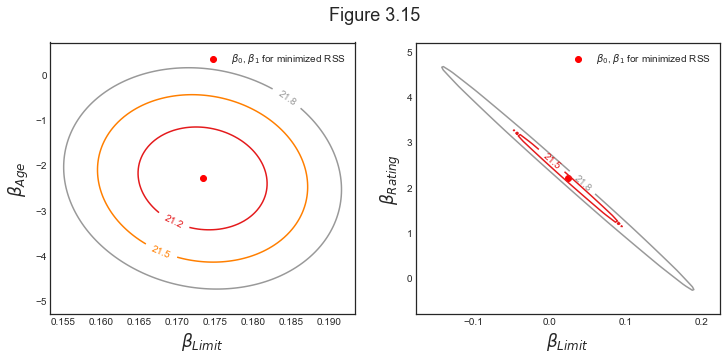

In [124]:
# Figure 3.15
fig = plt.figure(figsize=(12,5))
fig.suptitle('Figure 3.15', fontsize=18)

# Axes
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Minimum
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
    
# Left plot
CS = ax1.contour(X1, Y1, Z1, cmap=plt.cm.Set1, levels=[21.25, 21.5, 21.8])
ax1.scatter(regr1.coef_[1], regr1.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax1.set_ylabel(r'$\beta_{Age}$', fontsize=17)

# Right plot
CS = ax2.contour(X2, Y2, Z2, cmap=plt.cm.Set1, levels=[21.5, 21.8])
ax2.scatter(regr2.coef_[1], regr2.coef_[0], c='r', label=min_RSS)
ax2.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax2.set_ylabel(r'$\beta_{Rating}$', fontsize=17)
ax2.set_xticks([-0.1, 0, 0.1, 0.2])

for ax in fig.axes:
    ax.set_xlabel(r'$\beta_{Limit}$', fontsize=17)
    ax.legend()

As we can see, in the left plot the minimum is much better defined than in the right plot.

### Variance Inflation Factor - page 102

In [54]:
# Table 3.11 (1)
est_Age = smf.ols('Balance ~ Rating + Limit', credit).fit()
est_Age.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-377.5368,45.254,-8.343,0.000,-466.505,-288.569
Rating,2.2017,0.952,2.312,0.021,0.330,4.074
Limit,0.0245,0.064,0.384,0.701,-0.101,0.150


In [55]:
# Table 3.11 (2)
est_Rating = smf.ols('Balance ~ Age + Limit', credit).fit()
est_Rating.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-173.4109,43.828,-3.957,0.000,-259.576,-87.246
Age,-2.2915,0.672,-3.407,0.001,-3.614,-0.969
Limit,0.1734,0.005,34.496,0.000,0.163,0.183


## Next Lecture

Jump to [Session 2 - Instrumental Variables](https://nbviewer.jupyter.org/github/matteocourthoud/Machine-Learning-for-Economic-Analysis-2020/blob/master/2_iv.ipynb)